In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

In [2]:
def create_random_point(x0,y0,distance):
    """
            Utility method for simulation of the points
    """   
    r = distance/ 111300
    u = np.random.uniform(0,1)
    v = np.random.uniform(0,1)
    w = r * np.sqrt(u)
    t = 2 * np.pi * v
    x = w * np.cos(t)
    x1 = x / np.cos(y0)
    y = w * np.sin(t)
    return (x0+x1, y0 +y)

In [3]:
df_lanes = pd.read_csv('Candidate_Locations.csv')
df_lanes.head()

,L_x,L_y,B_j,XnE_j,Lane ID
0,25.317698,55.488839,3715,625,L1
1,25.298846,55.454846,3715,625,L2
2,25.298403,55.438383,3715,625,L3
3,25.286199,55.427122,3715,500,L4
4,25.297760,55.396421,3715,750,L5


In [4]:
df_lanes.shape[0]

10

In [5]:
Latitudes = df_lanes['L_x']

In [6]:
Longitudes = df_lanes['L_y']

In [18]:
V_x = []
V_y = []

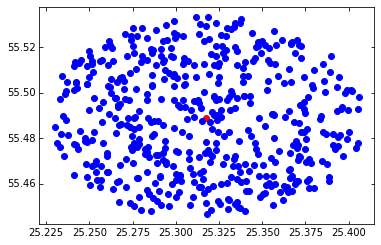

In [19]:
fig = plt.figure()
ax = host_subplot(111, axes_class=AA.Axes)

ax.set_autoscale_on(True)

for i in range(df_lanes.shape[0]):
    Lat1 = Latitudes[i]
    Long1 = Longitudes[i]
    ax.plot(Lat1,Long1,'ro')
    for i in range(1,501):
        x,y = create_random_point(Lat1,Long1 ,5000)
        V_x.append(x)
        V_y.append(y)
        ax.plot(x,y,'bo')  
    plt.show()

In [58]:
len(V_y)

5000

In [21]:
df_veh = pd.DataFrame(list(zip(V_x, V_y)), columns =['V_x','V_y'])

In [22]:
df_veh.head()

,V_x,V_y
0,25.368490,55.487431
1,25.244684,55.483104
2,25.265855,55.461110
3,25.266825,55.494608
4,25.338874,55.510999


In [23]:
df_veh.shape

(5000, 2)

In [35]:
x = lambda x: x in int(range(1,5001))

In [39]:
print (x)

<function <lambda> at 0x00000196EF86E0D0>


In [46]:
v_id = []
for i in range(1,5001):
    v_id.append('v{}'.format(i))
df_veh['Vehicle_ID'] = v_id

In [47]:
df_veh.head()

,V_x,V_y,Vehicle_ID
0,25.368490,55.487431,v1
1,25.244684,55.483104,v2
2,25.265855,55.461110,v3
3,25.266825,55.494608,v4
4,25.338874,55.510999,v5


In [48]:
df_veh.to_csv('vehicle_population.csv', index=False)